In [ ]:
''' Model Building
    Here we use 5 regression models as
    Linear Regression
    Random Forest Regression
    Support Vector Regressor
    Decision Tree Regressor
    XGBoost regressor
    Check the metrics of the model
    save the model
'''

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Turbine_data.csv",low_memory=False,parse_dates=["Unnamed: 0"])
df.head()

,Unnamed: 0,ActivePower,AmbientTemperatue,WindDirection,WindSpeed
0,2018-01-01 00:00:00+00:00,-5.357727,23.148729,8.000000,2.279088
1,2018-01-01 00:10:00+00:00,-5.822360,23.039754,300.428571,2.339343
2,2018-01-01 00:20:00+00:00,-5.279409,22.948703,340.000000,2.455610
3,2018-01-01 00:30:00+00:00,-4.648054,22.966851,345.000000,2.026754
4,2018-01-01 00:40:00+00:00,-4.684632,22.936520,345.000000,1.831420


In [2]:
df.shape

(118080, 5)

In [5]:
# duplicate the date column to change it's name 
#parsing dates
df['DateTime'] = df['Unnamed: 0'] 
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
# Add datetime parameters 
df['DateTime'] = pd.to_datetime(df['DateTime'], 
 format = '%Y-%m-%dT%H:%M:%SZ', 
 errors = 'coerce')

df['year'] = df['DateTime'].dt.year
df['month'] = df['DateTime'].dt.month
df['day'] = df['DateTime'].dt.day
df['hour'] = df['DateTime'].dt.hour
df['minute'] = df['DateTime'].dt.minute

In [4]:
#check for null values
df.isna().sum()

ActivePower          23330
AmbientTemperatue    24263
WindDirection        45802
WindSpeed            23485
DateTime                 0
year                     0
month                    0
day                      0
hour                     0
minute                   0
dtype: int64

In [7]:
#handling null values
df['AmbientTemperatue'].fillna(int(df['AmbientTemperatue'].mean()), inplace=True)
df['WindDirection'].fillna(int(df['WindDirection'].mean()), inplace=True)
df['WindSpeed'].fillna(int(df['WindSpeed'].mean()), inplace=True)
df['ActivePower'].fillna(int(df['ActivePower'].mean()), inplace=True)

In [6]:
#splitting dependent and independent features
independent_features = df[['month','day','AmbientTemperatue','WindDirection','WindSpeed']]
independent_features.head()

,month,day,AmbientTemperatue,WindDirection,WindSpeed
0,1,1,23.148729,8.000000,2.279088
1,1,1,23.039754,300.428571,2.339343
2,1,1,22.948703,340.000000,2.455610
3,1,1,22.966851,345.000000,2.026754
4,1,1,22.936520,345.000000,1.831420


In [7]:
target = df['ActivePower']

In [8]:
df_new = independent_features
X=np.asanyarray(df_new).astype('int')
y=np.asanyarray(target).astype('int')
print(X.shape)
print(y.shape)

(118080, 5)
(118080,)


In [9]:
# splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [11]:
# predicting 
y_train_predict=LR.predict(X_train)
y_test_predict=LR.predict(X_test)

In [12]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("\n-----Training Accuracy-------")
print(round(LR.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(LR.score(X_test,y_test),3)*100)


-------Test Data--------
MAE: 149.04421616824322
MSE: 43810.98108666043
RMSE: 209.31072855126283

-------Train Data--------
MAE: 149.11934775839532
MSE: 42671.04510091187
RMSE: 206.56971002766082

-----Training Accuracy-------
85.8
-----Testing Accuracy--------
85.39999999999999


# SVM Regressor

In [ ]:
#SVM regressor
from sklearn import preprocessing
from sklearn import svm

svm_regr = svm.SVC(kernel='rbf')
svm_regr.fit(X_train, y_train) 

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_test_predict = svm_regr.predict(X_test)
y_train_predict = svm_regr.predict(X_train)

In [ ]:
from sklearn import metrics
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))


print("\n-----Training Accuracy-------")
print(round(svm_regr.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(svm_regr.score(X_test,y_test),3)*100)


# Decision Tree Regressor

In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
dec_model = DecisionTreeRegressor(random_state =1)

In [12]:
dec_model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1)

In [13]:
#13.Test the model
y_test_pred =dec_model.predict(X_test)
y_test

array([ -5,  -8, 972, ..., 284,  66,  -5])

In [14]:
y_preds = dec_model.predict(X_train)

In [15]:
y_test_pred = dec_model.predict(X_test)

In [16]:
import math
from sklearn.metrics import mean_absolute_error,r2_score
print(math.sqrt(mean_absolute_error(y_train,y_preds)))


3.7195365334034864


In [17]:
print(math.sqrt(mean_absolute_error(y_test,y_test_pred)))

7.900532258260076


In [40]:
from sklearn import metrics
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_preds))
print('MSE:', metrics.mean_squared_error(y_train, y_preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_preds)))


print("\n-----Training Accuracy-------")
print(round(dec_model.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(dec_model.score(X_test,y_test),3)*100)


-------Test Data--------
MAE: 62.41840996380805
MSE: 14889.978097767444
RMSE: 122.02449794105873

-------Train Data--------
MAE: 13.834952023323225
MSE: 2258.2346855734895
RMSE: 47.520886834880194

-----Training Accuracy-------
99.2
-----Testing Accuracy--------
95.0


In [17]:
print(math.sqrt(mean_absolute_error(y_test,y_test_pred)))


7.900532258260076


In [29]:
print(r2_score(y_train,y_preds))

0.9924647507707248


In [18]:
print(r2_score(y_test,y_test_pred))

0.9502981638437535


In [18]:
#save the model
import joblib
joblib.dump(dec_model,'dec_model.sav')

['dec_model.sav']

In [ ]:
2018-01-01 15:40:00+00:00	216.0396777	27.39363139	258	4.479508732


In [31]:
y_preds = model.predict([[1,1,27.39363139,258,4.479508]])
y_preds

array([212.])

# Random Forest Regressor

In [13]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)

In [14]:
y_train_predict=random_forest_model.predict(X_train)
y_test_predict=random_forest_model.predict(X_test)

In [15]:
print("-----------Training Accuracy------------")
print(round(random_forest_model.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(random_forest_model.score(X_test,y_test),3)*100)


-----------Training Accuracy------------
97.6
-----------Testing Accuracy------------
96.7


In [16]:
 from sklearn.metrics import mean_squared_error,r2_score

r2_score(y_train,y_train_predict)


0.9761993646024032

In [17]:
r2_score(y_test,y_test_predict)

0.9669643887056775

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from matplotlib.pyplot import figure
from sklearn.preprocessing import MinMaxScaler
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xg
import numpy as np
from sklearn import svm
from sklearn.linear_model import LinearRegression

# XGBoost Regressor

In [22]:
xg_model = xg.XGBRegressor()

In [23]:
xg_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [23]:
y_train_predict=xg_model.predict(X_train)
y_test_predict=xg_model.predict(X_test)

In [40]:
r2_score(y_train,y_train_predict)

0.9695960085906646

In [31]:
#x_std = (x-x.min(axis =0))/(x.max(axis=0)- x.min(axis =0))
from sklearn.preprocessing import MinMaxScaler
scale1 = MinMaxScaler()
scale2 = MinMaxScaler()
xscaled = scale1.fit_transform(X_train)
y_train = y_train.reshape(-1,1)
yscaled = scale2.fit_transform(y_train)
x_test_scaled = scale1.fit_transform(X_test)
y_test = y_test.reshape(-1,1)
y_test_scaled = scale2.fit_transform(y_test)

In [25]:
xg_model.fit(xscaled,yscaled)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [41]:
y_train_scaled_predict = xg_model.predict(xscaled)

In [42]:
y_test_scaled_pred = xg_model.predict(x_test_scaled)

In [33]:
print(r2_score(y_test_scaled,y_test_scaled_pred))

0.9620078964068732


In [27]:
r2_score(yscaled,y_train_scaled_predict)

0.9699157582990736

In [29]:
#save the model
import joblib
joblib.dump(xg_model,'xg_RFR_forecast_model.sav')

['xg_RFR_forecast_model.sav']

# ploting accuracy graph to choose best model for prediction

In [1]:
import numpy as np
import matplotlib.pyplot as plt

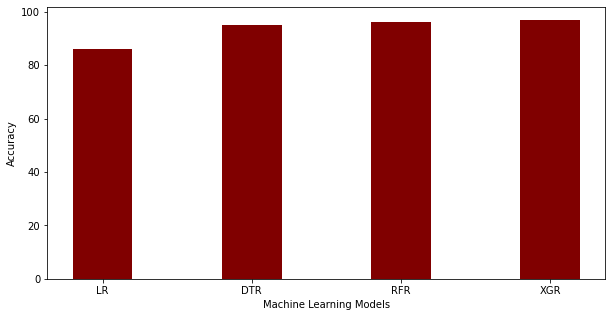

In [3]:
data ={"LR":85.9,"DTR":95.1,"RFR":96.2,"XGR":96.9}
models = list(data.keys())
acc = list(data.values())
fig = plt.figure(figsize =(10,5))
#bar plot
plt.bar(models,acc,color ='maroon',width =0.4)
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy")
plt.show()

# AS XGBoost Regressor modeling achieves high accuracy , so we choose our model as XGBoost Regressor